In [44]:
# loading the important modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import thinkstats2
import thinkplot

In [3]:
# Reading the dataset using pandas
sales_data = pd.read_csv("SalesKaggle3.csv")

### After loading the data into pandas dataframe, we will look into the various columns to see what values they contain with respect to the range of values and the nature of the columns.

In [4]:
# Gist of the dataset

sales_data

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,3.340110e+05,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


In [5]:
sales_data.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


### The columns in the existing dataset are as shown above

#### This dataset has 198,917 rows and 14 columns

In [7]:
sales_data.shape

(198917, 14)

In [8]:
df1 = sales_data.groupby('SKU_number').count()[['ItemCount','SoldFlag']]
df1

,ItemCount,SoldFlag
SKU_number,,
50001,2,1
50002,2,1
50003,2,1
50004,2,1
50005,2,1
...,...,...
3960560,1,0
3960724,1,0
3960742,1,0


In [9]:
df2=sales_data
df2.dropna
df2.shape

(198917, 14)

In [10]:
df2.isnull().values.any()

True

In [11]:
df2.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [12]:
skuwisegrp = pd.pivot_table(sales_data,values='ItemCount', index='SKU_number', columns=['File_Type'], 
                            fill_value=None, margins=False, dropna=True)
skuwisegrp.head(10)

File_Type,Active,Historical
SKU_number,,
50001,36.0,32.0
50002,110.0,99.0
50003,116.0,105.0
50004,74.0,70.0
50005,81.0,81.0
50006,102.0,93.0
50009,221.0,221.0
50011,NaN,30.0
50012,132.0,132.0


The describe function returns a pandas series type that provides descriptive statistics which summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. When we call the describe function with include=’all’ argument it displays the descriptive statistics for all the columns, which includes the categorical columns as well.

In [13]:
sales_data.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [14]:
#  nunique() would return the number of unique elements in each column
# It shows that there are 198917 orders.
# The categorical columns has 2 values like File_Type,SoldFlag,MarketingType,New_Release_Flag
sales_data.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

#### Looking at the above dataset it looks like that out of the 14 columns we are trying to see which items would be sold in the next year based on the current dataset

In [15]:
# We use the count function to find the number
# historical cases: we have 75996 historical cases which needs to be analyzed.
# active cases: we have 122921 active cases which needs to be analyzed.
historical = sales_data[sales_data['File_Type'] == 'Historical']['Order'].count()
current = sales_data[sales_data['File_Type'] == 'Active']['Order'].count()

print (historical, current)

75996 122921


### For categorical columns we plot histograms using the value_counts and the plot.bar functions to draw a bar plot, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values. 

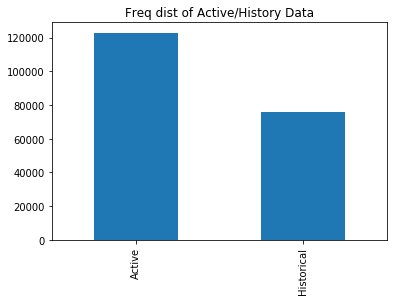

In [67]:
# Bar chart to show the categorical variables in the dataset
sales_data['File_Type'].value_counts().plot.bar(title = 'Freq dist of Active/History Data');

In [16]:
# We then Split the dataset into two parts based on the flag type.
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

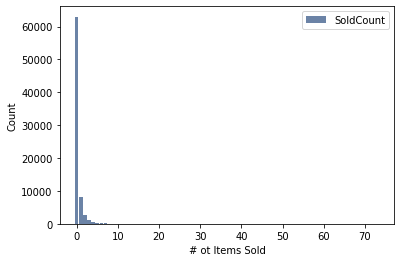

In [47]:
hist = thinkstats2.Hist(sales_data_hist.SoldCount, label='SoldCount')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='# ot Items Sold', ylabel='Count')

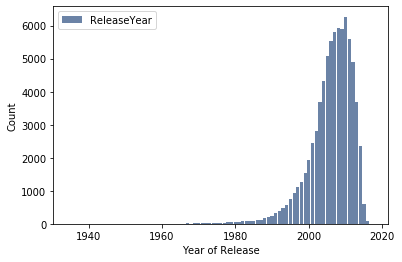

In [46]:
hist = thinkstats2.Hist(sales_data_hist.ReleaseYear, label='ReleaseYear')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Year of Release', ylabel='Count')

In [17]:
# This shows the data counts for the history data and the active count
print(sales_data_hist.shape,sales_data_act.shape)

(75996, 14) (122921, 14)


In [13]:
sales_data_hist.nunique()

Order               75996
File_Type               1
SKU_number          75996
SoldFlag                2
SoldCount              37
MarketingType           2
ReleaseNumber          66
New_Release_Flag        2
StrengthFactor      74603
PriceReg             9010
ReleaseYear            68
ItemCount             406
LowUserPrice        11186
LowNetPrice         12495
dtype: int64

In [118]:
# The history file has no Null values
sales_data_hist.isnull().values.any()

False

In [120]:
# The current file has no Null values. So let us find out which columns are those
sales_data_act.isnull().values.any()

True

In [123]:
# This shows  that the current file has the SoldCount and SoldFlag columns null for all rows
# This is expected as we would eventually use the history file to predict the flags and counts
sales_data_act.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [57]:
sales_data_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             75996 non-null  int64  
 1   File_Type         75996 non-null  object 
 2   SKU_number        75996 non-null  int64  
 3   SoldFlag          75996 non-null  float64
 4   SoldCount         75996 non-null  float64
 5   MarketingType     75996 non-null  object 
 6   ReleaseNumber     75996 non-null  int64  
 7   New_Release_Flag  75996 non-null  int64  
 8   StrengthFactor    75996 non-null  float64
 9   PriceReg          75996 non-null  float64
 10  ReleaseYear       75996 non-null  int64  
 11  ItemCount         75996 non-null  int64  
 12  LowUserPrice      75996 non-null  float64
 13  LowNetPrice       75996 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.7+ MB


In [96]:
d1 = sales_data_hist['SoldCount'].value_counts()
n1 = np.array(d1)
n1.shape

(37,)

In [11]:
sales_data_hist['SoldFlag'].value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

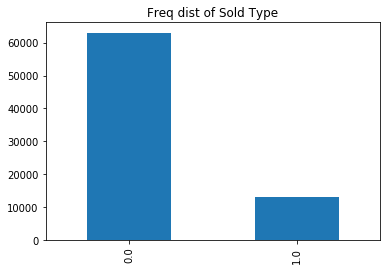

In [65]:
sales_data_hist['SoldFlag'].value_counts().plot.bar(title = 'Freq dist of Sold Type');

In [12]:
sales_data_hist['MarketingType'].value_counts()

S    40877
D    35119
Name: MarketingType, dtype: int64

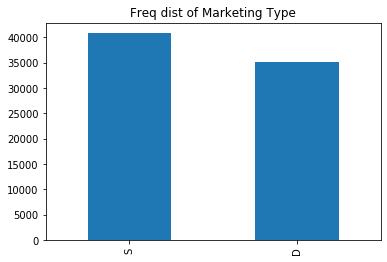

In [66]:
sales_data_hist['MarketingType'].value_counts().plot.bar(title = 'Freq dist of Marketing Type');

### Next we do the analysis of the different variables. We are using the historical dataset for our analysis. The Active Dataset would be used for the predictions. This is done plotting histograms for each of the variables and studying the spread and statistical properties of each of those.

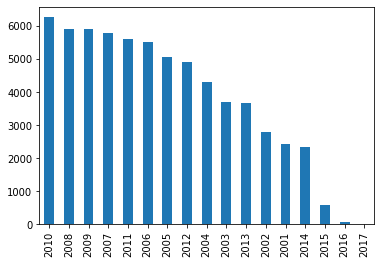

In [73]:
df = sales_data_hist
df1 = df[df['ReleaseYear'] > 2000]
df1['ReleaseYear'].value_counts().plot.bar()

In [84]:
year = sales_data_hist['ReleaseYear']
soldFlag = sales_data_hist['SoldFlag']
soldCount = sales_data_hist['SoldCount']

In [129]:
df1 = sales_data_hist.groupby(['SoldFlag','SoldCount'])
# df1.first()
df1.value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

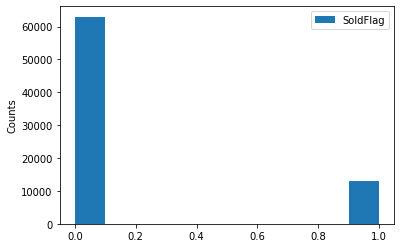

In [93]:
plt.hist(soldFlag, label = 'SoldFlag')
plt.legend()
plt.ylabel('Counts');


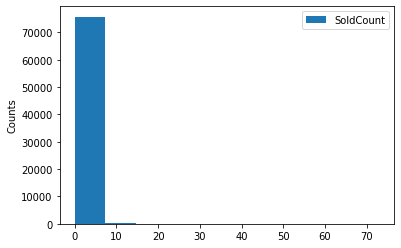

In [124]:
plt.hist(soldCount, label = 'SoldCount')
plt.legend()
plt.ylabel('Counts');

In [18]:
# sales_data_hist['SoldCount'].value_counts().plot.bar(title = 'Sold Count')
sales_data_hist['SoldCount'].value_counts()

0.0     63000
1.0      8179
2.0      2545
3.0      1018
4.0       483
5.0       253
6.0       149
7.0       121
8.0        62
9.0        32
10.0       30
12.0       28
11.0       21
14.0       11
13.0       10
16.0        9
15.0        6
18.0        5
19.0        4
22.0        4
17.0        3
26.0        3
27.0        3
24.0        2
21.0        2
36.0        2
33.0        1
28.0        1
51.0        1
25.0        1
30.0        1
20.0        1
34.0        1
69.0        1
35.0        1
73.0        1
40.0        1
Name: SoldCount, dtype: int64

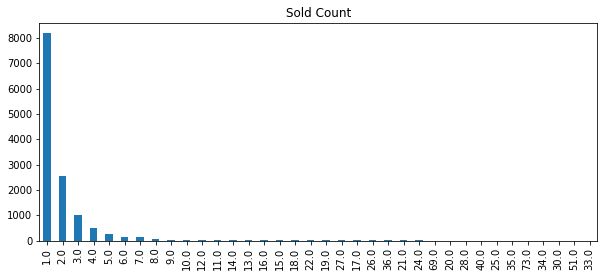

In [40]:
df_sold = sales_data_hist[sales_data_hist['SoldCount']>0]
# df_sold

df_sold.SoldCount.value_counts().plot.bar(title = 'Sold Count',figsize=(10,4))
# df_sold.SoldCount.plot.hist(title = 'Sold Count')

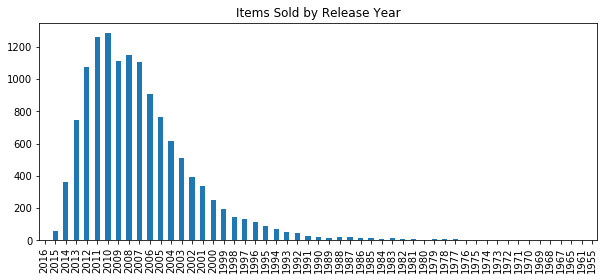

In [37]:
df_sold.ReleaseYear.value_counts().sort_index(ascending=False).plot.bar(title = 'Items Sold by Release Year',figsize=(10,4))


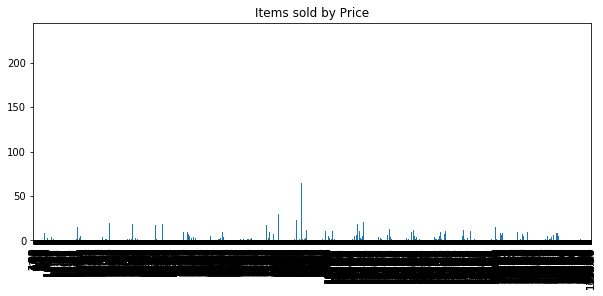

In [42]:
df_sold.PriceReg.value_counts().sort_index(ascending=True).plot.bar(title = 'Items sold by Price',figsize=(10,4))

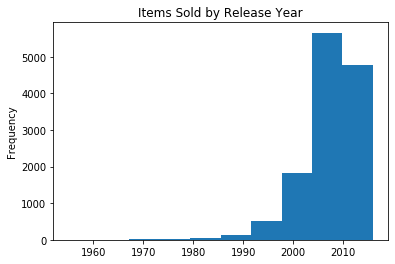

In [140]:
df_sold.ReleaseYear.plot.hist(title = 'Items Sold by Release Year')

In [133]:
sales_data_hist['ItemsSold'] = pd.cut(x=sales_data_hist['SoldCount'], bins=[5,10,100])
sales_data_hist.ItemsSold

C:\Users\saman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
75991    NaN
75992    NaN
75993    NaN
75994    NaN
75995    NaN
Name: ItemsSold, Length: 75996, dtype: category
Categories (2, interval[int64]): [(5, 10] < (10, 100]]

In [76]:
print_info(n1)

number of elements: 194970
number of dimensions: 2
shape: (3, 64990)
data type: float64
strides: (519920, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



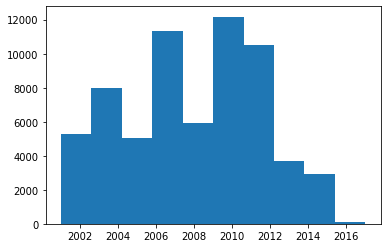

In [78]:
plt.hist(year);

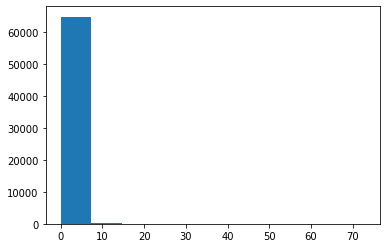

In [79]:
plt.hist(soldCount);

#### Categorical Columns are 1) MarketingType, 2) New_Release_Flag
### Plotting histograms for the above categorical data

In [55]:
s1 = sales_data_hist['ReleaseYear']
s1

0        2015
1        2005
2        2013
3        2006
4        2010
         ... 
75991    2008
75992    2004
75993    2006
75994    2012
75995    2001
Name: ReleaseYear, Length: 75996, dtype: int64

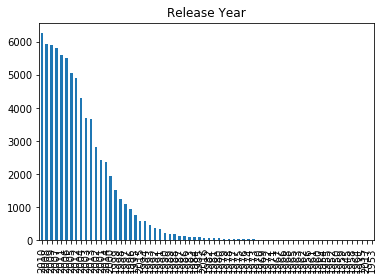

In [45]:
sales_data_hist['ReleaseYear'].value_counts().plot.bar(title = 'Release Year')

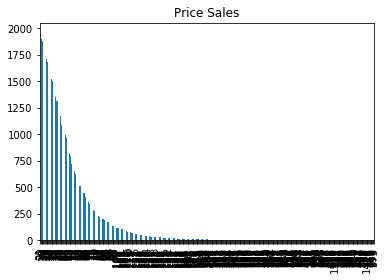

In [47]:
sales_data_hist['ItemCount'].value_counts().plot.bar(title = 'Price Sales')

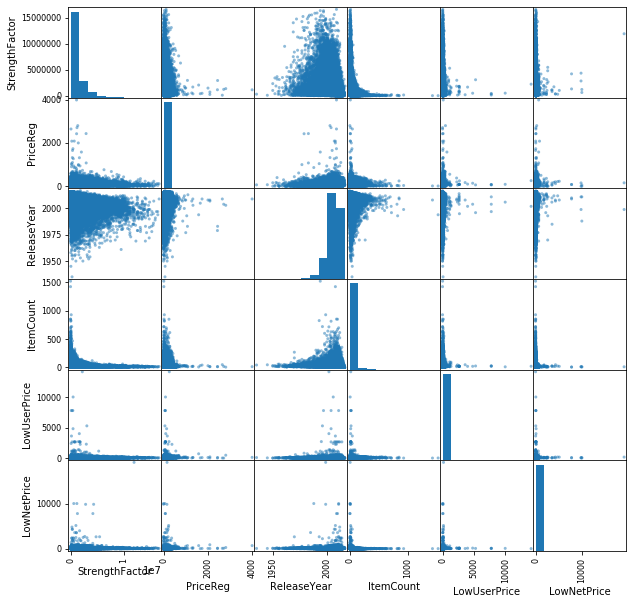

In [59]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']
sales_data_hist1 = sales_data_hist[col_names]
pd.plotting.scatter_matrix(sales_data_hist1, figsize=(10,10));

In [75]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 455976
number of dimensions: 2
shape: (75996, 6)
data type: float64
strides: (8, 607968)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [ ]:
a = np.array(sales_data_hist1)